In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv("C:\\Users\\CVR\\Desktop\\Project_6654\\inventory_data_noisy.csv")
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18360 non-null  object 
 1   Product_ID   18360 non-null  object 
 2   Date         18360 non-null  object 
 3   Quantity     18268 non-null  float64
 4   Consumption  18268 non-null  float64
 5   Location     18176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 860.8+ KB


In [32]:
df.isnull().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [33]:
df.dtypes

Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object

In [34]:
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())
df['Consumption']=df['Consumption'].fillna(df['Consumption'].median())
df['Location']=df['Location'].fillna(df['Location'].mode()[0])

In [35]:
df.isnull().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [36]:
df.describe()

,Quantity,Consumption
count,18360.000000,18360.000000
mean,59.105704,12.933824
std,70.907332,13.280293
min,10.000000,5.000000
25%,32.000000,8.000000
50%,55.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


In [37]:
df.drop_duplicates()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.000000,8.0,Chicago
1,D000,P000,2022-01-02,70.000000,9.0,Chicago
2,D000,P000,2022-01-03,12.000000,17.0,Los Angeles
3,D000,P000,2022-01-04,74.000000,13.0,Los Angeles
4,D000,P000,2022-01-05,57.000000,10.0,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.0,New York
18264,D001,P010,2022-01-27,26.000000,18.0,Chicago
18328,D001,P014,2022-01-14,30.000000,5.0,Chicago
18337,D001,P013,2022-01-26,48.000000,15.0,Chicago


In [38]:
df.dtypes

Dealer_ID       object
Product_ID      object
Date            object
Quantity       float64
Consumption    float64
Location        object
dtype: object

In [39]:
df['Date']=pd.to_datetime(df['Date'],format='%y-%m-%d',errors='coerce')

In [40]:
df.dtypes

Dealer_ID              object
Product_ID             object
Date           datetime64[ns]
Quantity              float64
Consumption           float64
Location               object
dtype: object

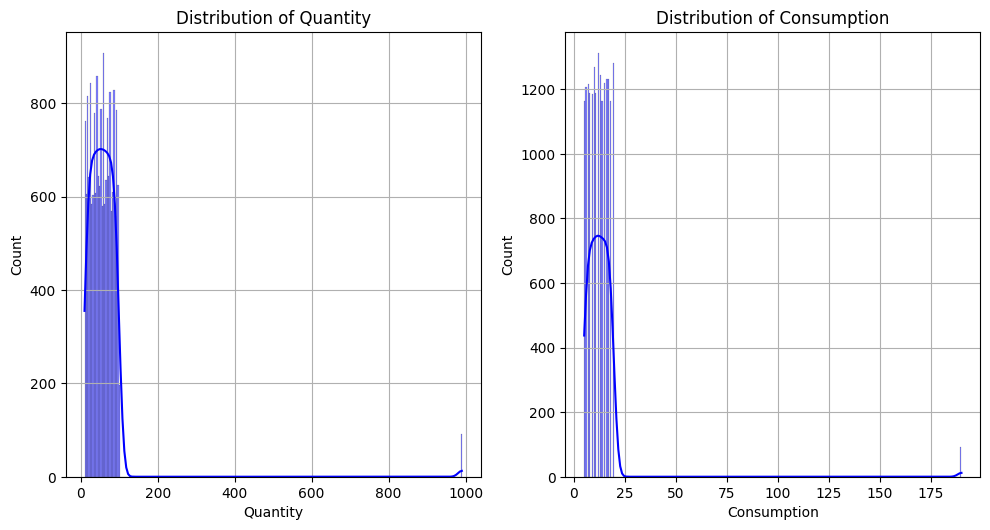

In [ ]:
df_eda = df
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.grid(True)  
plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')
plt.grid(True)  
plt.tight_layout()  
plt.show()

Text(0.5, 1.0, 'Boxplot of Consumption')

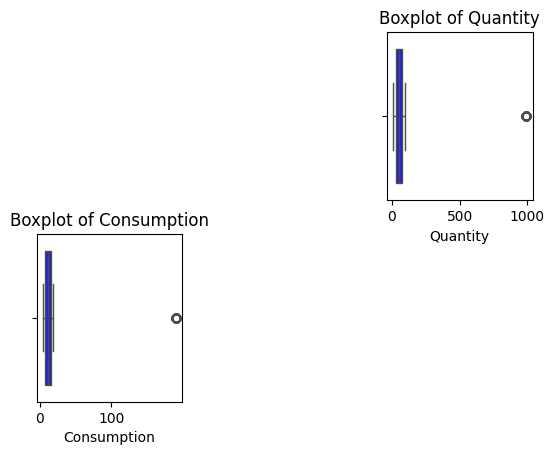

In [44]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [45]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Select the columns for outlier removal (adjust as needed)
columns_to_filter = ["Quantity", "Consumption"]  
df= remove_outliers_iqr(df, columns_to_filter)


Text(0.5, 1.0, 'Distribution of Consumption')

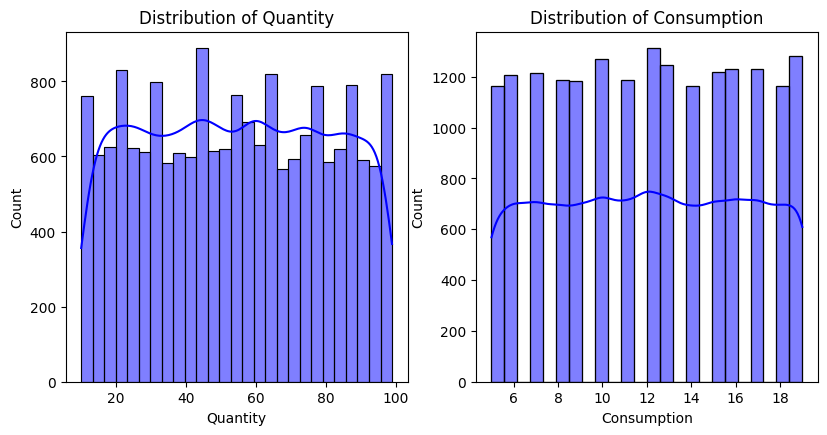

In [56]:
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(15, 10))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

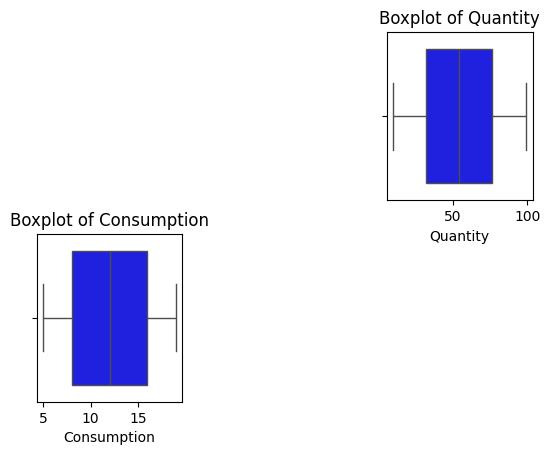

In [47]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [48]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())


Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


In [49]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Date', 'Quantity', 'Consumption']

We have 3 categorical features : ['Dealer_ID', 'Product_ID', 'Location']


In [50]:
## Adding column requirement based on Quantity and Consumption
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [51]:
# Create a new categorical target column
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

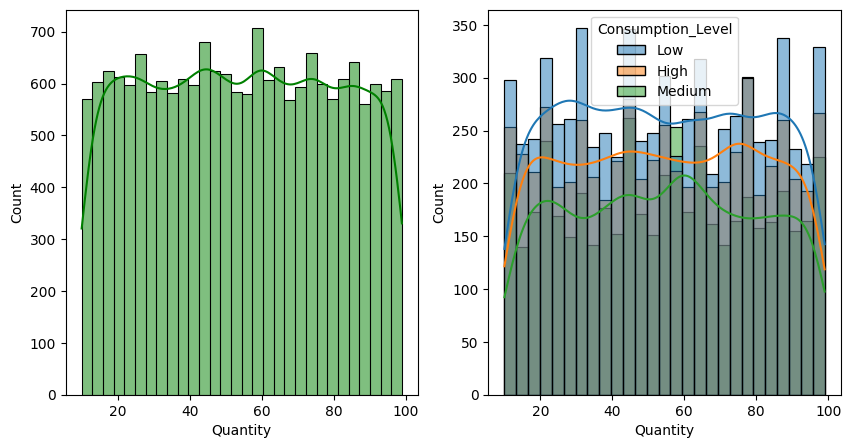

In [55]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

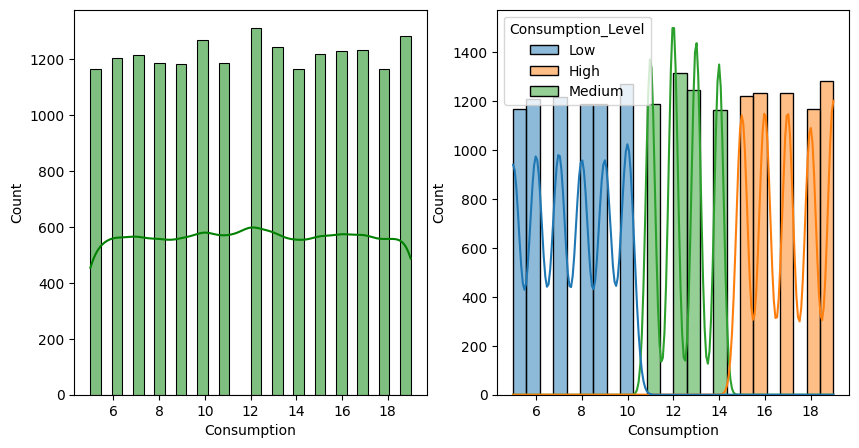

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

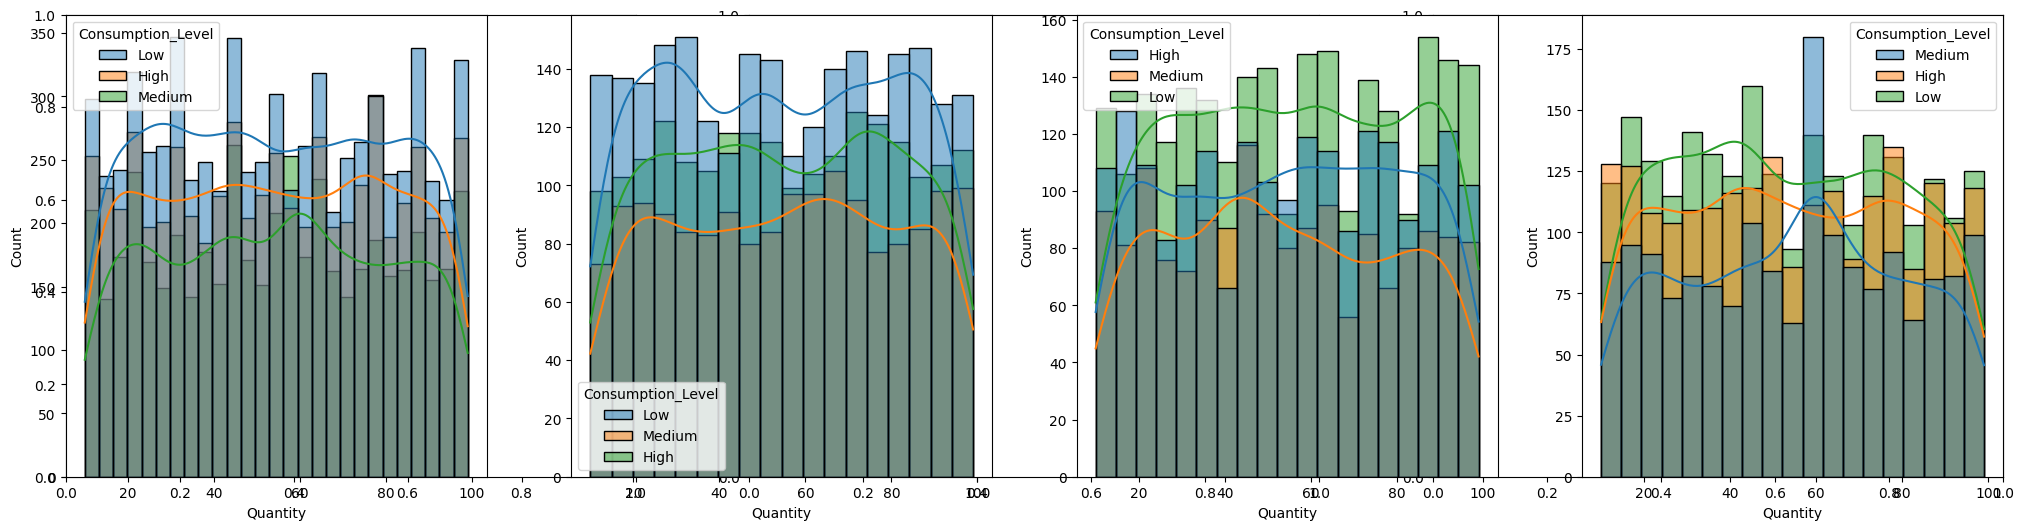

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

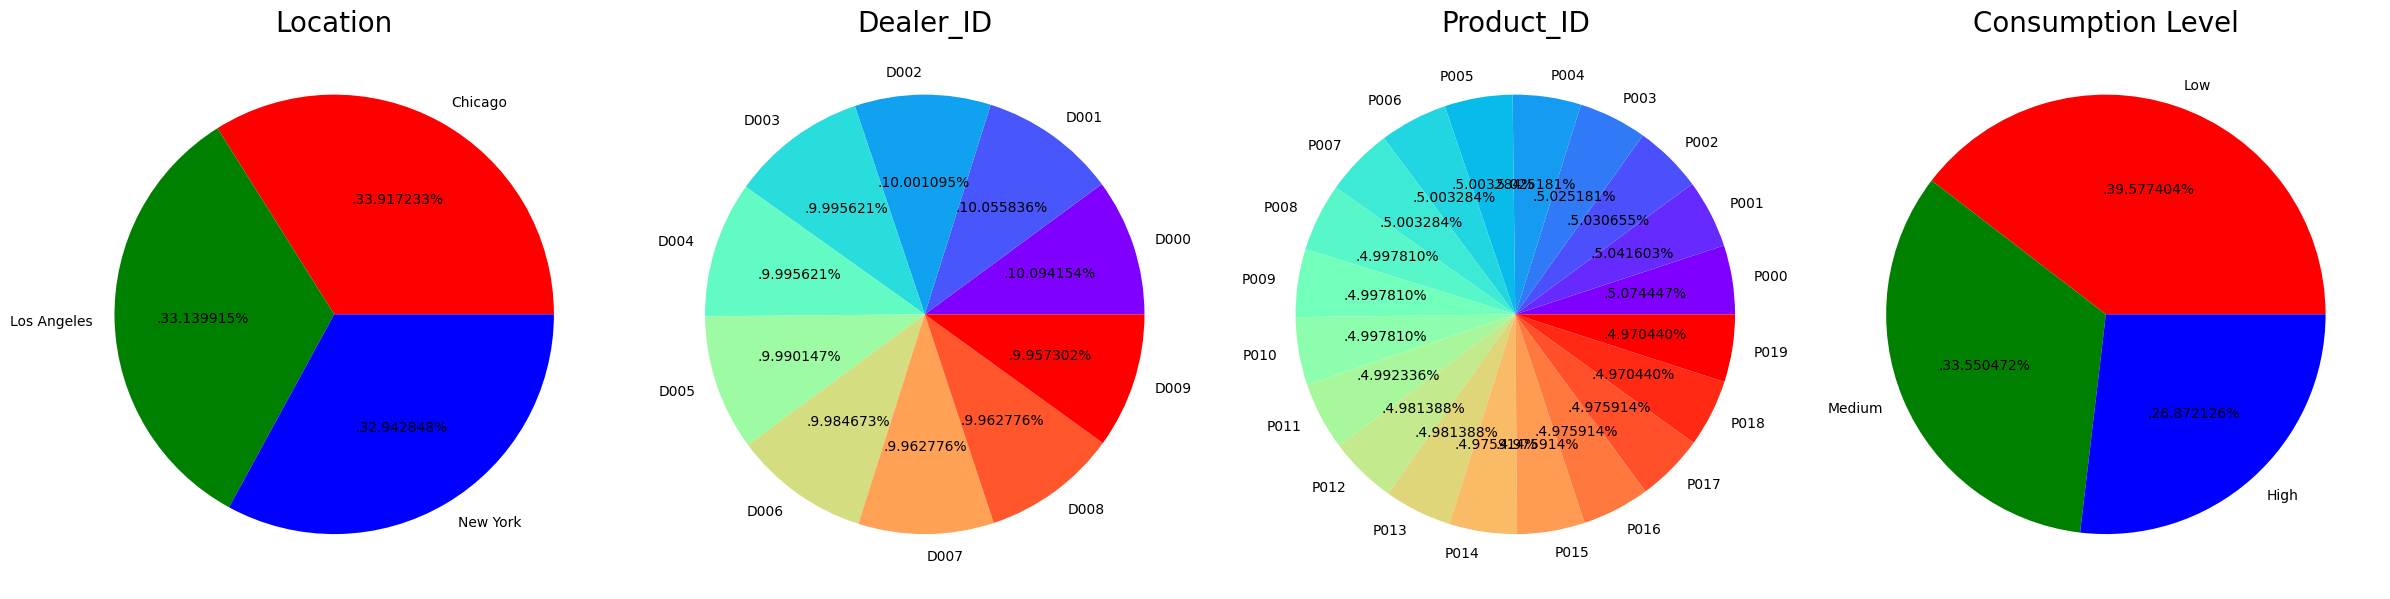

In [58]:
## Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = 'Chicago', 'Los Angeles','New York'
color = ['red','green','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = 'D000', 'D001','D002','D003','D004','D005','D006','D007','D008','D009'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Dealer_ID', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = 'P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Product_ID', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Consumption_Level'].value_counts()
labels = 'Low', 'Medium','High'
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Consumption Level', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

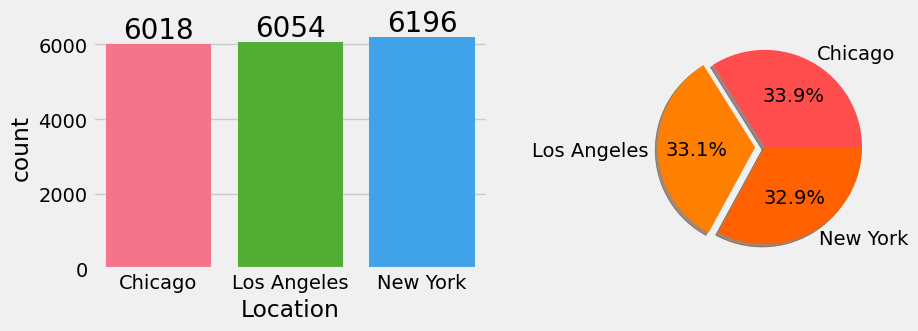

In [80]:
f,ax=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=df['Location'],data=df,palette ='husl',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

In [62]:
location_group = df.groupby('Location')
location_group

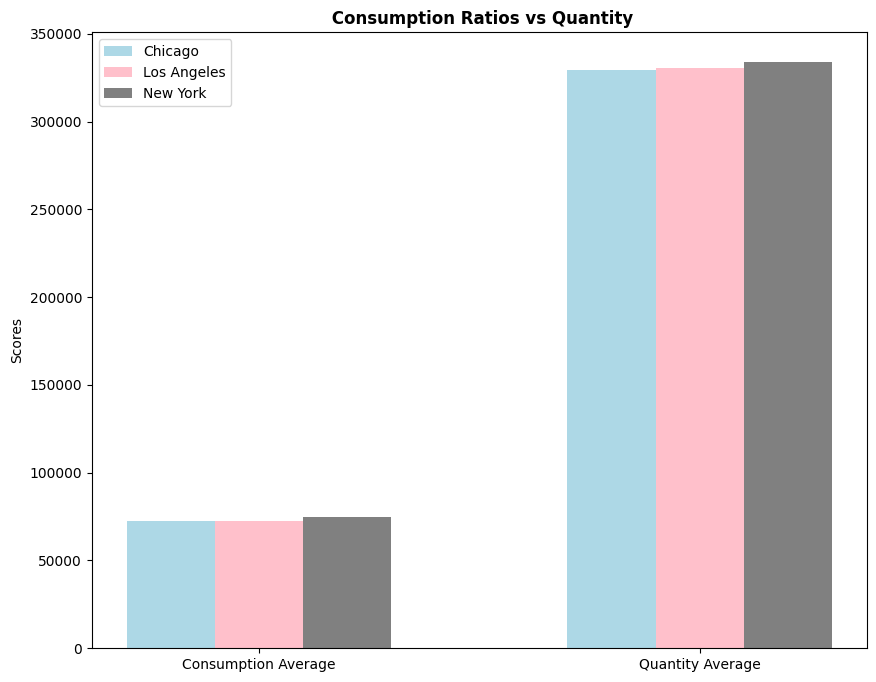

In [67]:

location_group = df.groupby('Location')[['Consumption','Quantity']].sum()
# Extracting the required data from the aggregated DataFrame
chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]

# Plot
plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))

# Plot the bars with proper offsets for each city
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago',color='lightblue')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles',color='pink')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York',color='grey')

# Set the x-axis labels and the chart's title
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title(" Consumption Ratios vs Quantity", fontweight='bold')

# Show legend and plot
plt.legend()
plt.show()


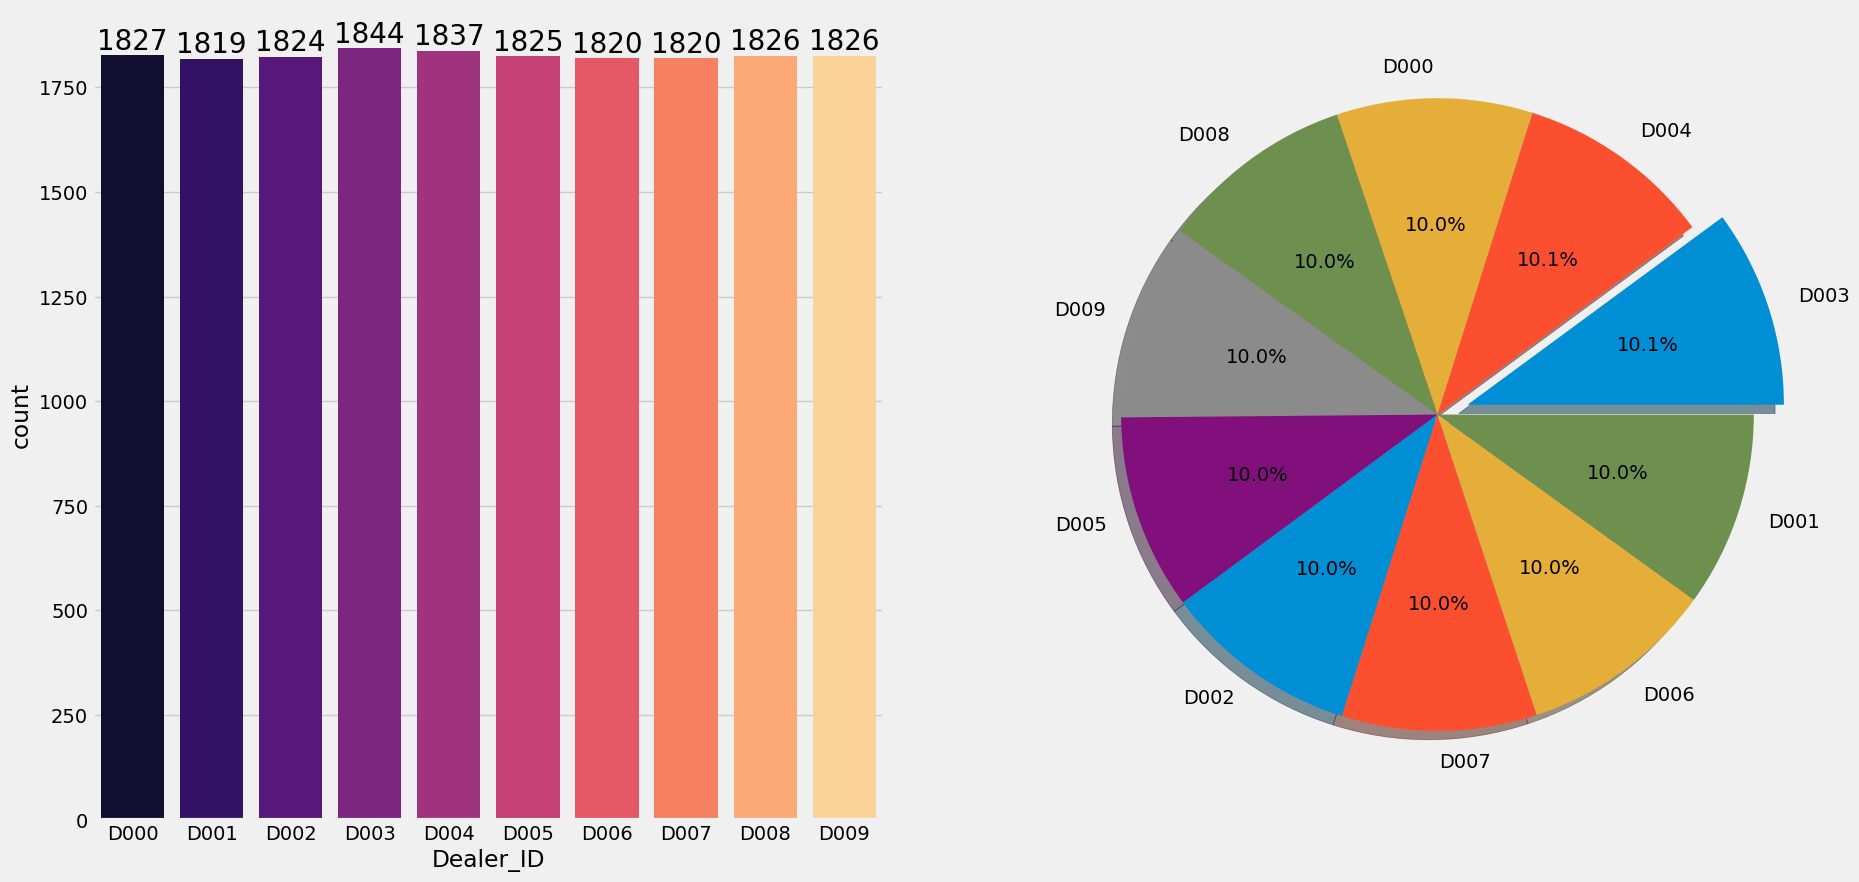

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'magma',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

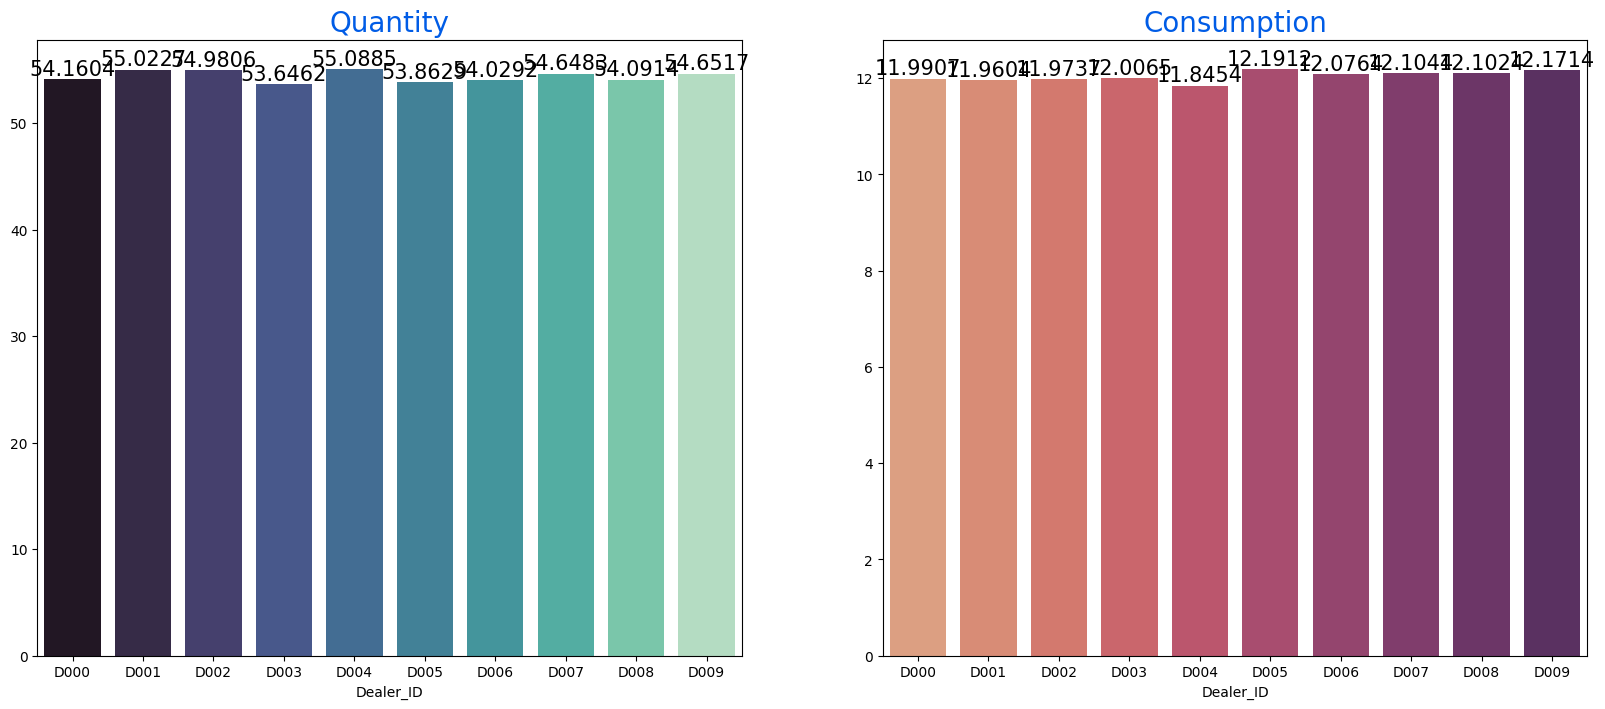

In [69]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


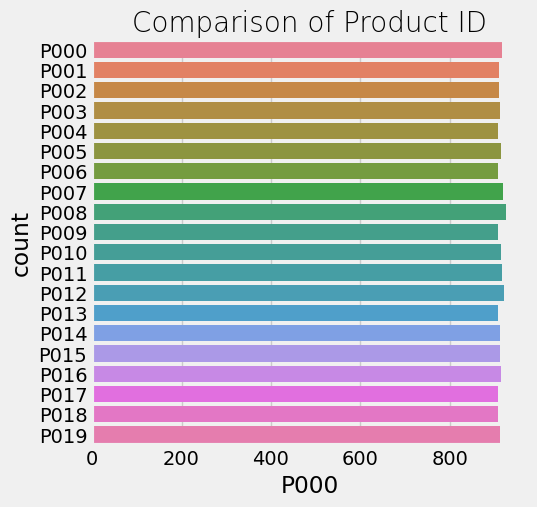

In [78]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'husl')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

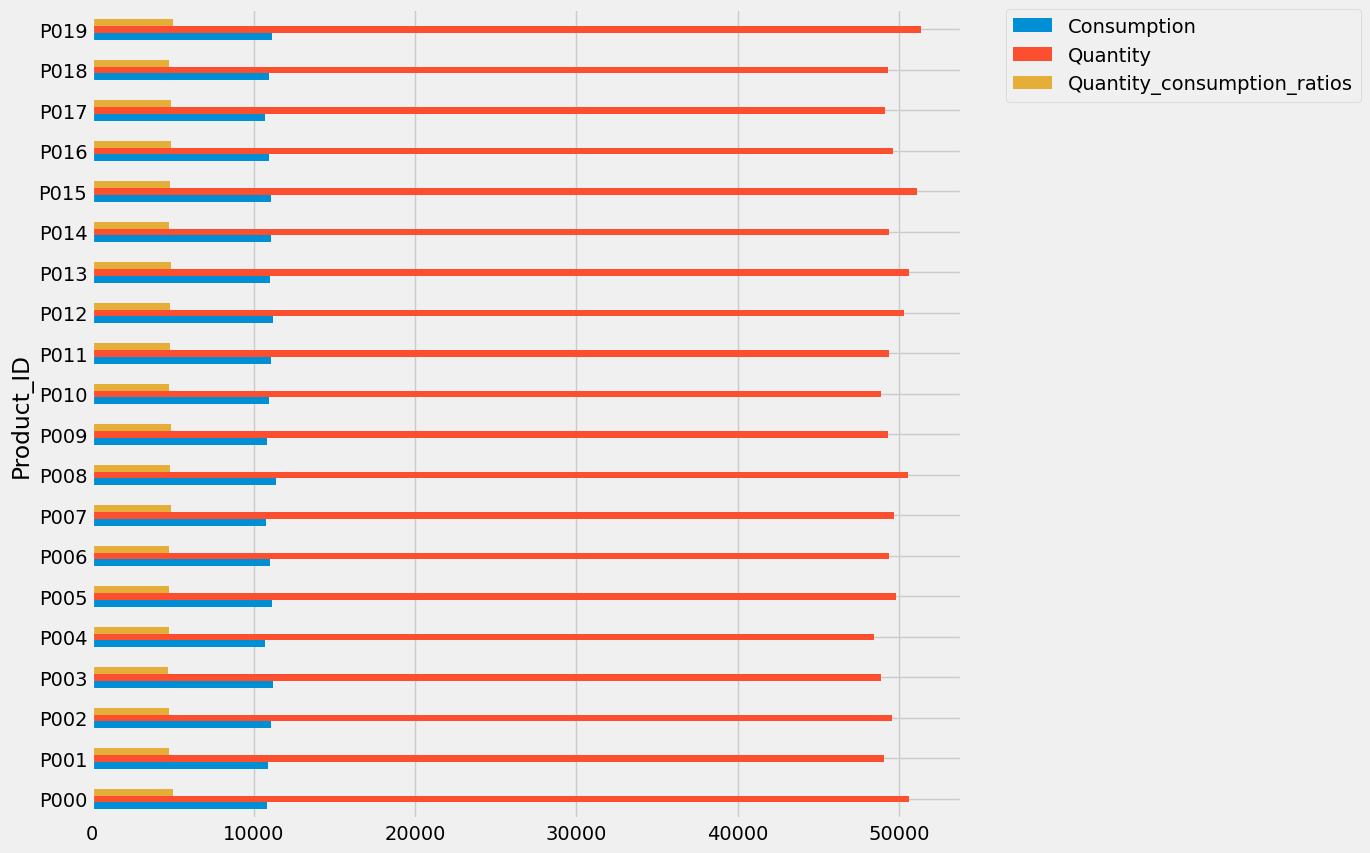

In [75]:
df.groupby('Product_ID')[['Consumption','Quantity','Quantity_consumption_ratios']].agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()